Convection-diffusion equation along a rod. Thelength is L and $0<x<L$. 
The ODE equation is
\begin{equation}
- A k\frac{d^2 T}{d x^2}+P \beta (T-T_0)=0
\end{equation}
Boundary conditions:\
$\theta(0)=300$ and $d \theta/dx(L)=0$ 

In [203]:
#Importing the packages
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sp
from numpy.polynomial import chebyshev as C

In [197]:
#We define the Chabyshev nodes from -1 to 1

L=0.05
A=np.pi*(0.02**2)/4*50
M=100*np.pi*0.02
m=M/A
T0=300


# Chebyshev nodes
N=5
xn=(np.cos(np.arange(0,N)/(N-1)*np.pi)) #*L/2)+L/2

In [36]:
xn

array([ 0.025     ,  0.02431807,  0.02229086,  0.01897369,  0.01445703,
        0.00886408,  0.00234741, -0.00491523, -0.01272573, -0.02087103,
       -0.02912897, -0.03727427, -0.04508477, -0.05234741, -0.05886408,
       -0.06445703, -0.06897369, -0.07229086, -0.07431807, -0.075     ])

In [198]:
#We compute the matrix. NOTE that the matrix is filled
c=np.array([1,2])
D1=np.zeros((N,N))
for i in range(0,N):
    for j in range(0,N):
        if i==0 or i==N-1:
            II=1 
        else:
            II=0
        if j==0 or j==N-1:
            JJ=1 
        else:
            JJ=0
        if i!=j:
            D1[i,j]=(c[II]*(-1)**(i+j))/(c[JJ]*(xn[i]-xn[j]))
        elif i==j and i!=0 and i!=N-1:
            D1[i,j]=-xn[i]/(2*(1-xn[i]**2))
        

D1[0,0]=(2*(N-1)**2+1)/6
D1[N-1,N-1]=-D1[0,0]

D2=np.dot(D1,D1)

In [199]:
## We write the algebraic system to solve
D=-4*A/L**2*D2+M*np.identity(N);

D[-1,:]=np.append(np.zeros(N-1),1)
D[0,:]=D1[0,:]

f=M*20*L*np.ones(N,)
f[-1]=300
f[0]=0

Tn=np.linalg.solve(D,f)

<function matplotlib.pyplot.show(close=None, block=None)>

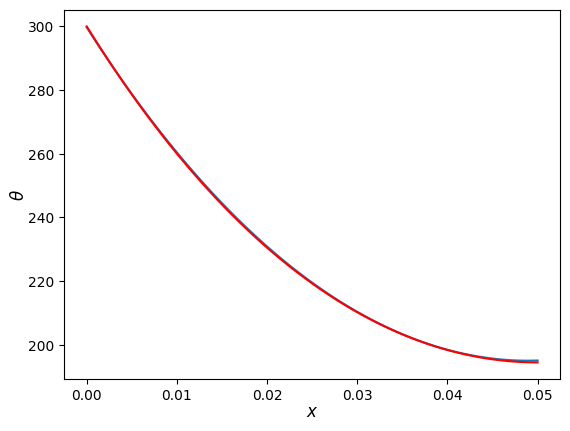

In [213]:
#We plot the results
xn=(np.cos(np.arange(0,N)/(N-1)*np.pi)) #*L/2)+L/2

x=np.linspace(0,L,100)
y=np.linspace(-1,1,100)

Theta=T0*np.cosh(np.sqrt(m)*(L-x))/(np.cosh(np.sqrt(m)*L))

coeff=C.chebfit(xn,Tn,N)

TTn=np.zeros(100,)
for j in range(0,N):
    T=np.cos(j*np.arccos(y))
    TTn=TTn+coeff[j]*T

#To plot we firsly take the points of the mesh
#plt.plot(xn,Tn,color='blue')
plt.plot(x,TTn)
plt.plot(x,Theta,color='red')
plt.xlabel(r'$x$', fontsize=12, labelpad=0.05)
plt.ylabel(r'$\theta$', fontsize=12, labelpad=0.05)
plt.show


Convection-diffusion equation along a rod. Thelength is L and $0<x<L$. 
The ODE equation is
\begin{equation}
- A k\frac{d^2 T}{d x^2}+P \beta (T-T_0)=0
\end{equation}
Boundary conditions:\
$\theta(0)=300$ and $d \theta/dx(L)=0$ 